In [4]:
import fitz  
import re
from collections import defaultdict
import matplotlib.pyplot as plt

import sys
sys.path.append('../common/')
from common import *


file_path = '2022-AL-GEN.pdf'
doc = fitz.open(file_path)


text = ''
for page in doc:
    text += page.get_text()

text[:1000]  


'2022 RESULTS: GENERAL CERTIFICATE OF EDUCATION EXAMINATION - ADVANCED LEVEL\n2022 GCE RESULTS\nCentre No:  11000 CCAS KUMBA B  \nRegist: 142, Sat for 2 or more Subjects: 142, Passed : 65\n% Passed : 45.77, Sanctioned : 2\nResults of Successful Candidates In Order Of Merit\nPassed In 5 Subjects: 2\nMBAH TENGU GOLDA FOH BIO-B,CHE-D,CSC-D,PHY-E,PMM-B\n(1)\nDEBA EGBE ALICE ETTANDIP BIO-E,CHE-E,FSN-C,PHY-E,PMM-D\n(2)\nPassed In 4 Subjects: 10\nNTAH BULLINE BIO-C,CHE-D,PHY-B,PMM-C\n(1)\nEKUPE GLADYS EPOH BIO-E,CHE-D,FSN-B,GGY-D\n(2)\nAKEM KELLY MANYI ETTANDOM BIO-E,CHE-C,PHY-E,PMM-C\n(3)\nMUABE MILANI EPOLLE ECO-D,GEO-E,HIS-D,ICT-C\n(4)\nMOBONYA MARIA BESAMBE BIO-E,CHE-D,FSN-B,GGY-E\n(5)\nBRIAN TABE BESONG BIO-E,CHE-C,FSN-C,GGY-E\n(6)\nNIKOBO IMMACULATE MASUME ECO-D,GEO-E,ICT-C,PMS-D\n(7)\nEYAMBE SHARON OKANYENE ENG-D,HIS-E,LIT-E,PHI-B\n(8)\nBLAISE FIAGMENYI ECO-E,ENG-D,HIS-C,LIT-E\n(9)\nPOUTCHEU PUNGE RACHEL MANUELA ENG-E,FRE-E,HIS-E,LIT-D\n(10)\nPassed In 3 Subjects: 18\nEYONG ROSIETA TRA

In [5]:


pattern = re.compile(r'([A-Z\s]+)\s*([A-Z]{3,5}-[A-E](?:,\s*[A-Z]{3,5}-[A-E])*)\s*\(\d+\)')

In [6]:
candidates = pattern.findall(text)
dict_candidates = { candidate[0].strip(): Record(candidate) for candidate in candidates }
grade_distribution = defaultdict(GradeDist)
# Summary of candidates
print(f"Total number of candidates: {len(dict_candidates)}")

Total number of candidates: 42483


In [7]:
def top_n_percent(grade_distribution, grade):
    total_candidates = len(dict_candidates)
    candidates_considered = 0
    while grade <= 25:
        candidates_considered += grade_distribution[grade].count
        grade += 1
    return candidates_considered / (total_candidates*100/70) * 100 # accounting for 70% failure rate

In [8]:


for ind, candidate in enumerate(dict_candidates):
    if ind == 10:
        break
    print(candidate, dict_candidates[candidate])

MBAH TENGU GOLDA FOH GPA: 2.60 | 13 points -> {'BIO': 'B', 'CHE': 'D', 'CSC': 'D', 'PHY': 'E', 'PMM': 'B'}
DEBA EGBE ALICE ETTANDIP GPA: 1.60 | 8 points -> {'BIO': 'E', 'CHE': 'E', 'FSN': 'C', 'PHY': 'E', 'PMM': 'D'}
NTAH BULLINE GPA: 3.00 | 12 points -> {'BIO': 'C', 'CHE': 'D', 'PHY': 'B', 'PMM': 'C'}
EKUPE GLADYS EPOH GPA: 2.25 | 9 points -> {'BIO': 'E', 'CHE': 'D', 'FSN': 'B', 'GGY': 'D'}
AKEM KELLY MANYI ETTANDOM GPA: 2.00 | 8 points -> {'BIO': 'E', 'CHE': 'C', 'PHY': 'E', 'PMM': 'C'}
MUABE MILANI EPOLLE GPA: 2.00 | 8 points -> {'ECO': 'D', 'GEO': 'E', 'HIS': 'D', 'ICT': 'C'}
MOBONYA MARIA BESAMBE GPA: 2.00 | 8 points -> {'BIO': 'E', 'CHE': 'D', 'FSN': 'B', 'GGY': 'E'}
BRIAN TABE BESONG GPA: 2.00 | 8 points -> {'BIO': 'E', 'CHE': 'C', 'FSN': 'C', 'GGY': 'E'}
NIKOBO IMMACULATE MASUME GPA: 2.00 | 8 points -> {'ECO': 'D', 'GEO': 'E', 'ICT': 'C', 'PMS': 'D'}
EYAMBE SHARON OKANYENE GPA: 2.00 | 8 points -> {'ENG': 'D', 'HIS': 'E', 'LIT': 'E', 'PHI': 'B'}


<BarContainer object of 24 artists>

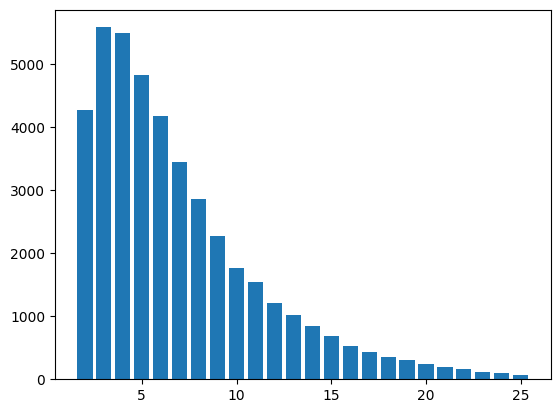

In [9]:
grade_distribution = defaultdict(GradeDist)
for candidate in dict_candidates:
    grade_distribution[dict_candidates[candidate].points].add(candidate)

plt.bar(grade_distribution.keys(), [grade_distribution[key].count for key in grade_distribution.keys()])

In [10]:
print("Points \t: \tNumber of candidates \t: \tTop n% of candidates")
print("------ \t: \t--------------------- \t: \t--------------------")
for key in sorted(grade_distribution.keys(), reverse=True):
    print(f"{key}\t: \t\t{grade_distribution[key]} \t\t: \t\t{top_n_percent(grade_distribution, key):.2f}%")

Points 	: 	Number of candidates 	: 	Top n% of candidates
------ 	: 	--------------------- 	: 	--------------------
25	: 		61 		: 		0.10%
24	: 		96 		: 		0.26%
23	: 		123 		: 		0.46%
22	: 		155 		: 		0.72%
21	: 		190 		: 		1.03%
20	: 		248 		: 		1.44%
19	: 		305 		: 		1.94%
18	: 		346 		: 		2.51%
17	: 		430 		: 		3.22%
16	: 		534 		: 		4.10%
15	: 		686 		: 		5.23%
14	: 		843 		: 		6.62%
13	: 		1018 		: 		8.30%
12	: 		1213 		: 		10.29%
11	: 		1542 		: 		12.84%
10	: 		1770 		: 		15.75%
9	: 		2268 		: 		19.49%
8	: 		2857 		: 		24.20%
7	: 		3450 		: 		29.88%
6	: 		4178 		: 		36.77%
5	: 		4830 		: 		44.72%
4	: 		5487 		: 		53.77%
3	: 		5579 		: 		62.96%
2	: 		4274 		: 		70.00%


In [11]:
## All 25 points candidates

print(f"Total {grade_distribution[25].count} candidates with 25 points")
print(f"Candidates with 25 points(top {top_n_percent(grade_distribution, 25):.2f}%):")
for candidate in grade_distribution[25].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 61 candidates with 25 points
Candidates with 25 points(top 0.10%):
	 FIDJIO TSOMEZA GIBRIL          	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'A', 'PMM': 'A'}
	 FOADIENG KEPSEU ARMANDE FLOREN 	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'A', 'PMM': 'A'}
	 MOKAM SISANG LORNA             	 GPA: 5.00 | 25 points -> {'ECO': 'A', 'HIS': 'A', 'ICT': 'A', 'LIT': 'A', 'PHI': 'A'}
	 MBUH AFAHNYU NKENGLA SAMUEL    	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'PHY': 'A', 'PMM': 'A'}
	 KUMBONG MAXWELL BERINYUY       	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'A', 'PMM': 'A'}
	 GRACE                          	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'A', 'PMM': 'A'}
	 AYAMBA MBOME NJIE TAKU TANYI   	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'A', 'PMM': 'A'}
	 ROBERT                         	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 

In [12]:
## All 24 points candidates

print(f"Total {grade_distribution[24].count} candidates with 24 points")
print(f"Candidates with 24 points(top {top_n_percent(grade_distribution, 24):.2f}%):")
for candidate in grade_distribution[24].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 96 candidates with 24 points
Candidates with 24 points(top 0.26%):
	 BILA EDAMBO ESSOH DIDIER CLAUD 	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'B', 'PMM': 'A'}
	 NANA NGANOU EMMANUELLE         	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'B', 'PMM': 'A'}
	 NFORMI JEBEN RYAN              	 GPA: 4.80 | 24 points -> {'BIO': 'B', 'CHE': 'A', 'FMA': 'A', 'PHY': 'A', 'PMM': 'A'}
	 KAMGA FOTSO CHRIST ELISE       	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'B', 'PMM': 'A'}
	 XAVIER                         	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'B', 'PMM': 'A'}
	 TENDONGFOR NICK JUNIOR NJUOKIA 	 GPA: 4.80 | 24 points -> {'CHE': 'A', 'CSC': 'B', 'FMA': 'A', 'PHY': 'A', 'PMM': 'A'}
	 SEVIDZEM MARILYN MAIKA         	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'B', 'PMM': 'A'}
	 NGALA CLARA MUNSI              	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 

In [13]:
## All 23 points candidates

print(f"Total {grade_distribution[23].count} candidates with 23 points")
print(f"Candidates with 23 points(top {top_n_percent(grade_distribution, 23):.2f}%):")
for candidate in grade_distribution[23].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 123 candidates with 23 points
Candidates with 23 points(top 0.46%):
	 DEUTOU TCHAMENI REBECCA GISELE 	 GPA: 4.60 | 23 points -> {'BIO': 'B', 'CHE': 'A', 'FMA': 'A', 'PHY': 'B', 'PMM': 'A'}
	 ACHALE OMA EBOBNSONYA          	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 'A', 'CSC': 'B', 'PHY': 'B', 'PMM': 'A'}
	 ROSE SHARON ANCHI TANGA        	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'B', 'PHY': 'B', 'PMM': 'A'}
	 FORCHA NKEZE PRIDE             	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 'A', 'CSC': 'C', 'PHY': 'A', 'PMM': 'A'}
	 WILBA ELISHA LARRY JUNIOR      	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 'A', 'FSN': 'A', 'PHY': 'B', 'PMM': 'B'}
	 ASONGWED GESLEN NGEH           	 GPA: 4.60 | 23 points -> {'CHE': 'A', 'CSC': 'B', 'FMA': 'A', 'PHY': 'B', 'PMM': 'A'}
	 SWIRI CONDOLIZZARICE AKUMAWAH  	 GPA: 4.60 | 23 points -> {'ECO': 'A', 'ENG': 'B', 'GEO': 'A', 'ICT': 'A', 'PMS': 'B'}
	 FONYUY BERKA DZEKEM JUNIOR     	 GPA: 4.60 | 23 points -> {'ECO': 'A', 'ENG':

In [14]:
## All 22 points candidates

print(f"Total {grade_distribution[22].count} candidates with 22 points")
print(f"Candidates with 22 points(top {top_n_percent(grade_distribution, 22):.2f}%):")
for candidate in grade_distribution[22].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 155 candidates with 22 points
Candidates with 22 points(top 0.72%):
	 TEBI ANAM SHEENA NYOH          	 GPA: 4.40 | 22 points -> {'BIO': 'A', 'CHE': 'B', 'FMA': 'A', 'PHY': 'C', 'PMM': 'A'}
	 NGERNYU CALEB TATA             	 GPA: 4.40 | 22 points -> {'CHE': 'A', 'CSC': 'C', 'FMA': 'A', 'PHY': 'B', 'PMM': 'A'}
	 FOTSO FOGUE PAUL VALERY        	 GPA: 4.40 | 22 points -> {'CHE': 'A', 'CSC': 'D', 'FMA': 'A', 'PHY': 'A', 'PMM': 'A'}
	 TATAH CLEVIS NGAILAIY          	 GPA: 4.40 | 22 points -> {'CSC': 'D', 'ECO': 'A', 'GEO': 'A', 'PHI': 'A', 'PMS': 'A'}
	 JANE AHONE ELOUNDOU            	 GPA: 4.40 | 22 points -> {'BIO': 'A', 'CHE': 'B', 'CSC': 'A', 'PHY': 'C', 'PMM': 'A'}
	 NKEM JEFERSON ACHIA            	 GPA: 4.40 | 22 points -> {'CHE': 'B', 'CSC': 'B', 'FMA': 'B', 'PHY': 'A', 'PMM': 'A'}
	 NKOUONLACK NGUEKA KATHLEEN     	 GPA: 4.40 | 22 points -> {'BIO': 'A', 'CHE': 'B', 'FMA': 'B', 'PHY': 'B', 'PMM': 'A'}
	 VISISIMBOM JOSEPH FERDRICK     	 GPA: 4.40 | 22 points -> {'BIO': 'A', 'CHE':

In [15]:
## All 21 points candidates

print(f"Total {grade_distribution[21].count} candidates with 21 points")
print(f"Candidates with 21 points(top {top_n_percent(grade_distribution, 21):.2f}%):")
for candidate in grade_distribution[21].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 190 candidates with 21 points
Candidates with 21 points(top 1.03%):
	 FONGUONG EDRICK NCHOMBONUI     	 GPA: 4.20 | 21 points -> {'BIO': 'A', 'CHE': 'B', 'CSC': 'C', 'PHY': 'B', 'PMM': 'A'}
	 EYOG JOSEPH EMMANUEL           	 GPA: 4.20 | 21 points -> {'BIO': 'B', 'CHE': 'B', 'FMA': 'B', 'PHY': 'B', 'PMM': 'A'}
	 FUANJIA AKEMFUA RYAN           	 GPA: 4.20 | 21 points -> {'BIO': 'A', 'CHE': 'B', 'ICT': 'B', 'PHY': 'C', 'PMS': 'A'}
	 RENE AKOH MINANG               	 GPA: 4.20 | 21 points -> {'BIO': 'A', 'CHE': 'B', 'FMA': 'C', 'PHY': 'A', 'PMM': 'B'}
	 SHUNYIN CHRISTAIN              	 GPA: 4.20 | 21 points -> {'CHE': 'A', 'FMA': 'A', 'ICT': 'C', 'PHY': 'C', 'PMM': 'A'}
	 TRACY NAKE LIMA                	 GPA: 4.20 | 21 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'D', 'PHY': 'B', 'PMM': 'A'}
	 ALIDU COURAGE SAMBA            	 GPA: 4.20 | 21 points -> {'BIO': 'A', 'CHE': 'B', 'FMA': 'B', 'PHY': 'C', 'PMM': 'A'}
	 SUNJO THERESE NYUYMINGKA       	 GPA: 4.20 | 21 points -> {'BIO': 'A', 'CHE':

In [16]:
## All 20 points candidates

print(f"Total {grade_distribution[20].count} candidates with 20 points")
print(f"Candidates with 20 points(top {top_n_percent(grade_distribution, 20):.2f}%):")
for candidate in grade_distribution[20].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 248 candidates with 20 points
Candidates with 20 points(top 1.44%):
	 INYIAKOD SAMUEL ETAH           	 GPA: 4.00 | 20 points -> {'ECO': 'A', 'ENG': 'D', 'GEO': 'A', 'HIS': 'C', 'ICT': 'A'}
	 TAKWA JUDE DANIRNYUY           	 GPA: 4.00 | 20 points -> {'CHE': 'A', 'CSC': 'D', 'FMA': 'B', 'PHY': 'B', 'PMM': 'A'}
	 NGO TENG BALENLA NGUIMBOUS CHR 	 GPA: 4.00 | 20 points -> {'BIO': 'A', 'CHE': 'B', 'FMA': 'C', 'PHY': 'C', 'PMM': 'A'}
	 OBI OBI ETCHU JUNIOR           	 GPA: 4.00 | 20 points -> {'BIO': 'A', 'CHE': 'B', 'ICT': 'A', 'PHY': 'E', 'PMS': 'A'}
	 TALETEH  NJEM NGENKENG COURAGE 	 GPA: 4.00 | 20 points -> {'ECO': 'B', 'FSN': 'A', 'HIS': 'B', 'ICT': 'B', 'LIT': 'C'}
	 TACHUA EMMANUEL ABOH           	 GPA: 4.00 | 20 points -> {'BIO': 'A', 'CHE': 'C', 'FMA': 'B', 'PHY': 'C', 'PMM': 'A'}
	 YUFONYUI HERMANN TANJONG NSAI  	 GPA: 4.00 | 20 points -> {'BIO': 'A', 'CHE': 'C', 'FMA': 'C', 'PHY': 'B', 'PMM': 'A'}
	 OBASEYO RAYAN DIOMO            	 GPA: 5.00 | 20 points -> {'ECO': 'A', 'GEO':

In [17]:
## All 19 points candidates

print(f"Total {grade_distribution[19].count} candidates with 19 points")
print(f"Candidates with 19 points(top {top_n_percent(grade_distribution, 19):.2f}%):")
for candidate in grade_distribution[19].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 305 candidates with 19 points
Candidates with 19 points(top 1.94%):
	 LAILON ZAINODINE KONGNYUY      	 GPA: 4.75 | 19 points -> {'ECO': 'A', 'GEO': 'A', 'HIS': 'B', 'PHI': 'A'}
	 TOMOH CLAUDE IKFINGEH          	 GPA: 3.80 | 19 points -> {'BIO': 'A', 'CHE': 'C', 'FMA': 'B', 'PHY': 'C', 'PMM': 'B'}
	 EKOUNDA BARBARA BETSALEL       	 GPA: 3.80 | 19 points -> {'ECO': 'A', 'ENG': 'D', 'FRE': 'B', 'HIS': 'B', 'LIT': 'B'}
	 BISSAI NKAA OHOUO PHILOMENE    	 GPA: 3.80 | 19 points -> {'BIO': 'A', 'CHE': 'B', 'CSC': 'D', 'PHY': 'C', 'PMM': 'A'}
	 NJUH BRIAN MBABOD              	 GPA: 3.80 | 19 points -> {'BIO': 'A', 'CHE': 'B', 'ICT': 'B', 'PHY': 'C', 'PMM': 'C'}
	 NDIKE ADULF MUKETE             	 GPA: 3.80 | 19 points -> {'BIO': 'A', 'CHE': 'B', 'FMA': 'D', 'PHY': 'C', 'PMM': 'A'}
	 TARDZENYUY NANCY NOEL BERINYUY 	 GPA: 3.80 | 19 points -> {'BIO': 'B', 'CHE': 'B', 'FMA': 'C', 'PHY': 'C', 'PMM': 'A'}
	 NKAFU JOFERSON AWUNG           	 GPA: 3.80 | 19 points -> {'BIO': 'B', 'CHE': 'B', 'ICT':